## Classification problem: 
### Pima Indians Diabetes Database Predict the onset of diabetes based on diagnostic measures

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score


import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

path="C:/Users/samue/OneDrive/Desktop/Python Files/MachineLearning/diabetes.csv"
diabetes = pd.read_csv(path)


#### Examining the first and last few records of the dataset

In [68]:
diabetes.head(5) 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [69]:
diabetes.tail(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [70]:
diabetes.shape

(768, 9)

## information about the variables 

In [71]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Note: all variables are numeric(int64 or float64) + Attributes of the dataset

Pregnancies: To express the Number of pregnancies

Glucose: To express the Glucose level in blood

BloodPressure: To express the Blood pressure measurement

SkinThickness: To express the thickness of the skin

Insulin: To express the Insulin level in blood

BMI: To express the Body mass index

DiabetesPedigreeFunction: To express the Diabetes percentage

Age: To express the age

Outcome: To express the final result 1 is Yes and 0 is No

### There are 768 observations in this dataset

### Examining missing data

In [75]:
diabetes.isna().sum() # Missing value not detected

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [76]:
# 2. Checking missing values
diabetes.isna().any() # to see the matrix diabetes.isna()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

## Examining the descriptive Statistics

In [98]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


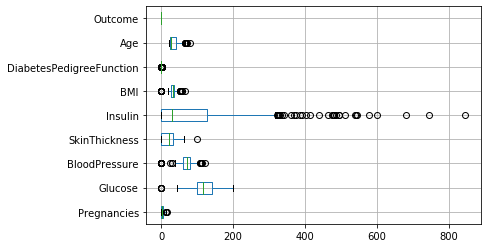

In [100]:
#box plot to visually inspect the features
diabetes.boxplot(vert=False)

In [90]:
diabetes['Insulin'].describe()

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

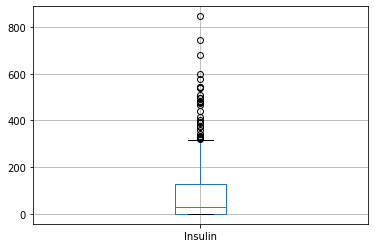

In [93]:
diabetes[['Insulin']].boxplot()

In [125]:
diabetes.groupby('Outcome').Insulin.describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,500.0,68.792000,98.865289,0.0,0.0,39.0,105.00,744.0
1,268.0,100.335821,138.689125,0.0,0.0,0.0,167.25,846.0


### IRQ of Insulin Level

In [157]:
Q1 = diabetes['Insulin'].quantile(0.25)
Q3 = diabetes['Insulin'].quantile(0.75)
IQR = Q3 - Q1
print('first quartile-',Q1,'\nthird quartile-',Q3,'\nInter Quartile Range',IQR)

print('lower level outlier border :', (Q1 - 1.5 * IQR))
print('upper level outlier border :', (Q3 + 1.5 * IQR))

Insulin_outlier_Check = diabetes[~((diabetes['Insulin'] < (Q1 - 1.5 * IQR)) | (diabetes['Insulin'] > (Q3 + 1.5 * IQR)))]
Insulin_outlier_Check.shape,diabetes.shape

first quartile- 0.0 
third quartile- 127.25 
Inter Quartile Range 127.25
lower level outlier border : -190.875
upper level outlier border : 318.125


((734, 9), (768, 9))

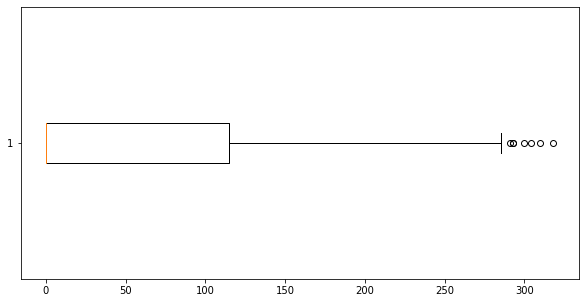

In [158]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.boxplot(Insulin_outlier_Check['Insulin'],vert=False)

plt.show()

In [159]:
Outliers = diabetes[((diabetes['Insulin'] < (Q1 - 1.5 * IQR)) | (diabetes['Insulin'] > (Q3 + 1.5 * IQR)))]
Outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
54,7,150,66,42,342,34.7,0.718,42,0
111,8,155,62,26,495,34.0,0.543,46,1
139,5,105,72,29,325,36.9,0.159,28,0
153,1,153,82,42,485,40.6,0.687,23,0
186,8,181,68,36,495,30.1,0.615,60,1
220,0,177,60,29,478,34.6,1.072,21,1
228,4,197,70,39,744,36.7,2.329,31,0
231,6,134,80,37,370,46.2,0.238,46,1


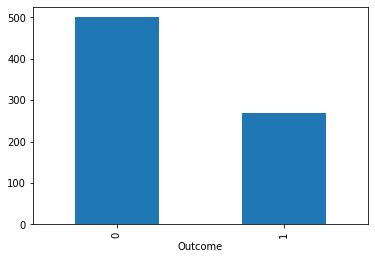

In [160]:
# distribution of Response varaible to examine if there is an extreme imbalance on the classes
diabetes.groupby('Outcome').size().plot(kind='bar')

##### Examining the assumptions of Logistic regression 
Linearity: The logistic regression model assumes that the relationship between the dependent variable and the independent variables is linear. change in the value of an independent variable is associated with a proportional change in the log odds of the dependent variable.

###### Example: scatter plot of Blood pressure vs Outcome

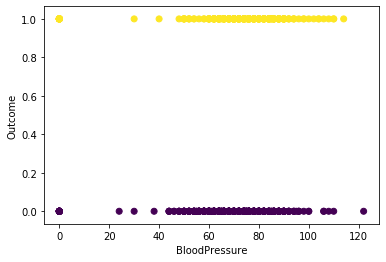

In [153]:

# Plot the scatter plot
plt.scatter(diabetes['BloodPressure'], diabetes['Outcome'], c=diabetes['Outcome'])
plt.xlabel('BloodPressure')
plt.ylabel('Outcome')
plt.show()

In [173]:
diabetes.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [177]:
# To Examine The correlation coefficint between Outcome and all the other predictors
diabetes.corr().loc['Outcome':]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.0


## Preparing the dataset for modeling

In [161]:
X = diabetes.drop(columns=['Outcome']).values
y = diabetes.Outcome.values

In [162]:
# Import necessary modules
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.4,random_state=42)



[[176  30]
 [ 56  46]]
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       206
           1       0.61      0.45      0.52       102

    accuracy                           0.72       308
   macro avg       0.68      0.65      0.66       308
weighted avg       0.71      0.72      0.71       308



## Fitting Nearest neighbor algorithm with k = 6 and Examine How good the model predict

In [178]:
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the training data
knn.fit(X_train,y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))


[[176  30]
 [ 56  46]]
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       206
           1       0.61      0.45      0.52       102

    accuracy                           0.72       308
   macro avg       0.68      0.65      0.66       308
weighted avg       0.71      0.72      0.71       308



#### Precision: Precision is the number of true positive predictions divided by the number of true positive predictions and false positive predictions. 
    
    Precision = TP/(TP+FP) = 176/(176+56) for Non Diabetic and TN/(TN + FN)= 46/(46+30) for Diabetic ==> out of all the samples the model predicted to be non diabetics, 76% of them were actually non diabetics. The precision for diabetic is 0.61, meaning that out of all the samples the model predicted to be diabetic, 61% of them were actually diabetic.

#### Recall: Recall is the number of true positive predictions divided by the number of true positive predictions and false negative predictions. 

    Recall = TP/(TP+FN) = 176/(176+30) for Non Diabetic and and TN/(TN+FP)= 46/(46+56) for diabetic  ==>  The recall for non diabetics is 0.85, meaning that the model correctly identified 85% of all non diabetics samples. The recall for diabetic is 0.45, meaning that the model correctly identified 45% of all diabetic samples.

#### F1-score: F1-score is the harmonic mean of precision and recall. It provides a single score to represent the overall performance of the model. 

    F1-Score = (Precision + Recall)/2  ==> The F1-score for non diabetics is 0.80 and the F1-score for diabetic is 0.52.

#### Support: Support is the number of samples in the test set that belong to each class

    In this example, the support for non diabetics is 206 and the support for diabetic is 102.

##### Accuracy: Accuracy is the number of correct predictions made by the model divided by the total number of predictions.

    Acurracy = (TP+TN)/(TP+TN+FP+FN) ==> The accuracy is 0.72, meaning that the model correctly predicted 72% of all samples in the test set.

Macro average: Macro average is the unweighted mean of the precision, recall, and F1-score for each class. 

    the macro average precision, recall, and F1-score are 0.68, 0.65, and 0.66 respectively.

Weighted average: Weighted average is the average of the precision, recall, and F1-score, weighted by the support of each class. 

    the weighted average precision, recall, and F1-score are 0.71, 0.72, and 0.71 respectively.

### Nearest Neighbor (KNN) algorithm with k=6 predicts the patients Diabetic status correctly with 72% Accuracy

## Plotting an ROC curve by fitting Logistic Regression
Classification reports and confusion matrices are great methods to quantitatively evaluate model performance, while ROC curves provide a way to visually evaluate models.

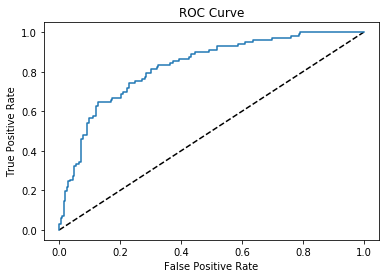

(308,)

In [163]:
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression

#ignoring Warnings
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=FutureWarning)


# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.4,random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train,y_train)

# Computing predicted probabilities
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# ROC curve values: FPR (False Positive Rate), TPR (True Positive Rate), thresholds
'''Note: FPR (False Positive Rate), TPR (True Positive Rate), and thresholds are metrics used to evaluate the performance
of binary classification models.
'''
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)

# Plotting ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

fpr.size, tpr.size,thresholds.size, y_pred_prob.shape
y_pred_prob.shape

In [164]:
'''# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
'''
# Using the train split data set for KNN algorithm train and fit logistic regression
log_reg = LogisticRegression().fit(X_train, y_train)

# Predict the classes for the samples in the test set
y_pred = log_reg.predict(X_test)

# Computing the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Computing the classification report
cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)


Confusion Matrix:
 [[175  31]
 [ 36  66]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       206
           1       0.68      0.65      0.66       102

    accuracy                           0.78       308
   macro avg       0.75      0.75      0.75       308
weighted avg       0.78      0.78      0.78       308



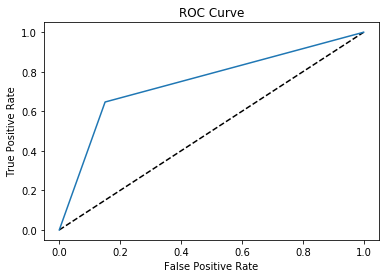

In [165]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred)

# Plotting ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

## True positive rate is also known as recall. 


other ways to visually evaluate model performance. One such way is the precision-recall curve, which is generated by plotting the precision and recall for different thresholds. 
precision and recall are defined as:

## Precision = Tp/(TP+FP)
## Recall = Tp/(TP+FN)


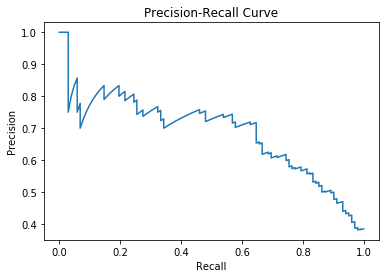

In [166]:

from sklearn.metrics import precision_recall_curve

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test,y_pred_prob)

# Plot the precision-recall curve
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()


## AUC- Area under the precision-recall curve, using the auc function 

In [167]:
from sklearn.metrics import auc
# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test,y_pred_prob)

# Calculate the area under the curve
auc_score = auc(recall, precision)
print("AUC:", auc_score)

cv_auc = cross_val_score(logreg,X,y,cv=5,scoring='roc_auc')
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))
print(np.mean(cv_auc))

AUC: 0.6850057114794484
AUC scores computed using 5-fold cross-validation: [0.7987037  0.80777778 0.81962963 0.86622642 0.85037736]
0.8285429769392033


In [168]:
# Import necessary modules
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test,y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg,X,y,cv=5,scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))


AUC: 0.8266228821625738
AUC scores computed using 5-fold cross-validation: [0.7987037  0.80777778 0.81962963 0.86622642 0.85037736]


## Hyperparameter tuning with GridSearchCV

Like the alpha parameter of lasso and ridge regularization , logistic regression also has a regularization parameter: C.  C controls the inverse of the regularization strength . A large C can lead to an overfit model, while a small  can lead to an underfit model.

Using GridSearchCV and logistic regression to find the optimal  in this hyperparameter space. 

In [169]:
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

'''# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()
'''
# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg,param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameters: {'C': 268.2695795279727}
Best score is 0.7708333333333334


## Hyperparameter tuning with RandomizedSearchCV
<p>GridSearchCV can be computationally expensive, especially if we are searching over a large hyperparameter space and dealing with multiple hyperparameters. A solution to this is to use RandomizedSearchCV, in which not all hyperparameter values are tried out. Instead, a fixed number of hyperparameter settings is sampled from specified probability distributions. </p>

In [170]:
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV


# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree,param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 8, 'min_samples_leaf': 2}
Best score is 0.7395833333333334


In [171]:

# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}


# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg,param_grid,cv=5)

# Fit it to the training data
logreg_cv.fit(X_train,y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameter: {'C': 31.622776601683793, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.7673913043478261


C:\Users\samue\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [172]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio':l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net,param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train,y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test,y_test)
mse = mean_squared_error(y_test,y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.0}
Tuned ElasticNet R squared: 0.24765337510702745
Tuned ElasticNet MSE: 0.16664179543611002


## Steps: 
1. Read the dataset
2. Examine the first and last few observations
3. Examine the information about the dataset and the features, datatypes, number of observations
3. Examine missing values 
4. Perform descriptive analysis and analyze the result if there is any pattern
5. Examine the distribution of the response variable('Outcome') to see if any imbalance on the dataset (if it is more than 1:10) using frequency distribution and bar chart
6. Examine the relationship between the response variable ('Outcome') and all the other predictors. Using correlation coeffiecient and scatter plot
7. Examine outliers using boxplot for numeric features (Calculate IRQ)
8. Transform variables to standardize the values 
8. Choose a model to fit for the classification oproblem (Logistic regression,Knn,DecisionTree...)
9. Prepare the dataset by splitting into train and test dataset 
10. fit a model
11. Evaluate the model using classification algorithm metrics
12. Tuning parameter (MOdel Optimization using GridSearch)
13. Compare models.
